In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print(valores_unicos_fuel_type)


['Petrol' 'Diesel' 'CNG' 'Electric' 'LPG']


In [1]:
#Check ID_fuel_type

# Sua coluna de tipos de combustível
fuel_types = df['fuel_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

for fuel_type in unique_fuel_types:
    k = sum(fuel_type in df['fuel_type'][i] for i in range(n_docs))  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero


for fuel_type, value in idf.items():
    print(f'{fuel_type:>15}: {value:>10}')

NameError: name 'df' is not defined

In [5]:
#Create fuel_type ID: IDF

fuel_types = df['fuel_type']

# Número de entradas no DataFrame
n_docs = len(df)

idf = {}

# valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

for fuel_type in unique_fuel_types:
    k = sum(fuel_type in df['fuel_type'][i] for i in range(n_docs))  # contagem de 1 tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # evitar divisão por zero

for fuel_type, value in idf.items():
    print(f'{fuel_type:>15}: {value:>10}')

# Criar nova coluna 'idf' no DataFrame
df['id_fuel_type'] = df['fuel_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

         Petrol: 0.18667511225498815
         Diesel: 0.500913650476359
            CNG: 1.5383795956654682
       Electric: 2.4457909564400544
            LPG: 2.7830331247584805
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi    

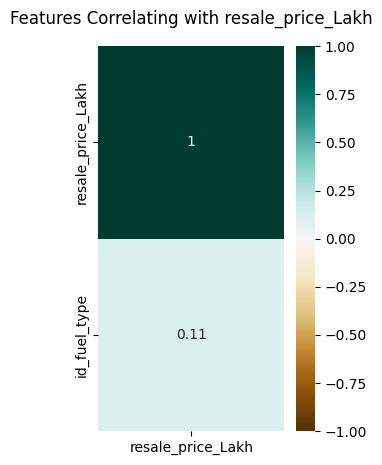

In [6]:
#correlation  

# Select columns
columns_of_interest = ['id_fuel_type', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()